---

# CSCI 3202, Spring 2022
# Homework 2
# Due: Friday February 18, 2022 at 6:00 PM

<br> 

### Your name: Téa Wright

<br> 

---
This homework requires that you install a few packages and libraries. **Before you start this assigment, read over the entire [github README](https://github.com/coloradointroai/hw_spring_2022).** Set yourself up early so you have the time to work through any bugs. Corrections will be made to the coloradointroai github if needed, pull often and check for updates regularly.

In [1]:
import os
import sys

# Allows this jupyter notebook to access the python code in ../colorado_intro_ai/*
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


# You need to complete #3 of the recommended setup before you change code in each class. Look at the README for information.
from colorado_intro_ai.hw2.robot import Robot

---
## Problem 1 - A* Search By Hand Problem

Use the graph below to implement A* Search to find the shortest path from node S to node G. Heuristic values are shown in red above each node. Step costs between nodes are shown near each respective edge in black.

![](../imgs/graph.png)

More specifics: Go through the A* algorithm by hand to determine the path that should be taken from $S$ to $G$. Fill in the table below to show the updated explored set and frontier with each iteration. The first iteration is done for you so that you can see the notation that is expected. If there are any ties, break them in alphabetical order.

| Explored Nodes | Frontier Nodes/Paths & f values  |
| :- | -: |
| $ $ | $(S,13)$ |
| $S$ | $(A,14),(B,16),(C,17)$ |
| $A$ | $(B,16),(D,16),(C,17)$ |
| $B$ | $(D,16),(C,17)$ |
| $D$ | $(C,17),(E,17)$ |
| $C$ | $(E,17),(F,22)$ |
| $E$ | $(F,22),(G,23)$ |
| $F$ | $(G,23)$ | 
| $G$ | 

---
## Problem 2 - A* Search Coding Problem

The A* objective function is expressed as $f(n) = g(n) + h(n)$, where $f(n)$ is the estimated cost to get form the start node to the goal node going through node $n$. $g(n)$ is the cost to get from the start to node $n$ and $h(n)$ is the estimated cost to move from node $n$ to the goal node. $h(n)$ is also known as a $\textit{heuristic}$ function. 

Familiarize yourself with the classes and documention linked below. You will implement your solutions to this problem inside of the [pathSolver.py](https://github.com/coloradointroai/hw_spring_2022/blob/master/colorado_intro_ai/hw2/pathSolver.py) class file in the cloned repository on your computer. 

## Links
* [Robot class file](https://github.com/coloradointroai/hw_spring_2022/blob/master/colorado_intro_ai/hw2/robot.py)
* [Enviornment class file](https://github.com/coloradointroai/hw_spring_2022/blob/master/colorado_intro_ai/hw2/enviornment.py)
* [PathSolver class file](https://github.com/coloradointroai/hw_spring_2022/blob/master/colorado_intro_ai/hw2/pathSolver.py)
* [Colorado intro ai documentation](https://coloradointroai.github.io)

### Usage examples

calliing BFS


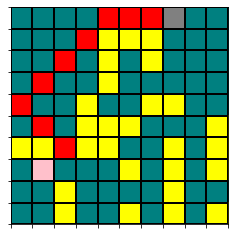

calliing BFS


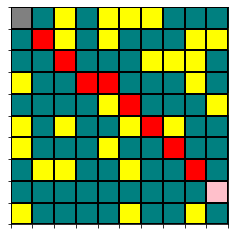

calliing BFS
Empty path given to show_env_and_path()
calliing BFS
Empty path given to show_env_and_path()
calliing BFS


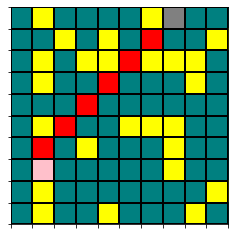

calliing BFS


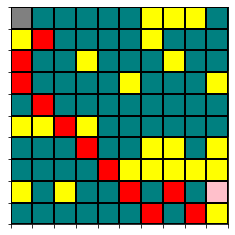

calliing BFS
Empty path given to show_env_and_path()
calliing BFS


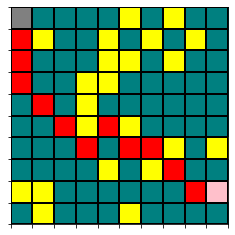

calliing BFS
Empty path given to show_env_and_path()
calliing BFS
Empty path given to show_env_and_path()
calliing BFS
Empty path given to show_env_and_path()
calliing BFS


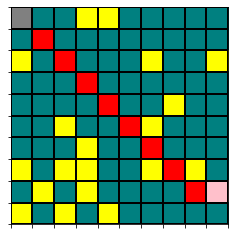

calliing BFS


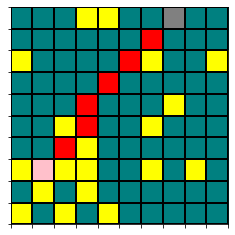

calliing BFS
Empty path given to show_env_and_path()
calliing BFS
Empty path given to show_env_and_path()
calliing BFS


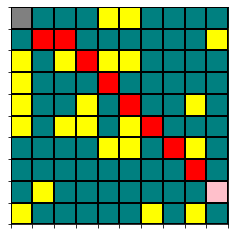

calliing BFS


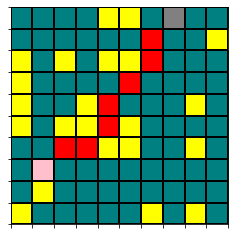

calliing BFS
Empty path given to show_env_and_path()
calliing BFS
Empty path given to show_env_and_path()
calliing BFS


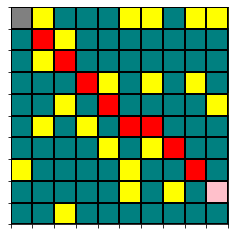

In [2]:

start = (0, 0)
goal = (8, 9)
robot = Robot()

for i in range(10):
    path = robot.path_solver.breadth_first_search((0,7), (7, 1), robot.env.edge_weights_2)
    robot.show_env_and_path(path)

    robot.refresh_env()

    path, cost = robot.path_solver.breadth_first_search(start, goal, robot.env.edge_weights_2, return_cost=True)
    robot.show_env_and_path(path)
    robot.refresh_env
    # print(cost)



### PART 2A) 
Implement the first three functions in [pathSolver.py](https://github.com/coloradointroai/hw_spring_2022/blob/master/colorado_intro_ai/hw2/pathSolver.py), you should copy your code from homework 1 and make the required changes to fit the function declaration. 

Note that breadth_first_search is already completed for you. So really you just need to implement depth_first_search and uniform_cost_search in pathSolver.py. 

In the cells below, demonstrate that each of the functions work by invoking each function using the `Robot` class as seen in the example above. For each algorithm, include the following:

- I) a visualization of the solved env using `show_env_and_path` and 
- II) the cost of each path in table (see the sample table below for how to format table rows and columns)


| this | is   |
|------|------|
|   a  | table|



In [3]:
from collections import deque
import heapq
from math import sqrt

class Frontier_PQ:
    def __init__(self,start,cost):
        self.start = start
        self.cost = cost
        self.states = {}
        self.q = [(cost,start)]   # reversed the order to match add
        
    def add(self,state,cost):
        self.q.append((cost, state))
        self.states[state] = cost
        
    def pop(self):
        return heapq.heappop(self.q) 
    
    def replace(self,state,cost):
        if cost > self.states[state]:
            self.states[state] = cost
            
"""
 Class PathSolver
"""

# Create PathSolver Class


class PathSolver:
    """Contains methods to solve multiple path search algorithms"""

    # init for PathSolver Class
    def __init__(self):
        """Create PathSolver"""

    def path(self, previous, s): 
        """
        `previous` is a dictionary chaining together the predecessor state that led to each state
        `s` will be None for the initial state
        otherwise, start from the last state `s` and recursively trace `previous` back to the initial state,
        constructing a list of states visited as we go
        """ 
        
        if s is None:
            return []
        else:
            return self.path(previous, previous[s])+[s]

    def pathcost(self, path, step_costs):
        """add up the step costs along a path, which is assumed to be a list output from the `path` function above"""
        
        cost = 0
        for s in range(len(path)-1):
            cost += step_costs[path[s]][path[s+1]]
        return cost
    

    def breadth_first_search(self,start: tuple, goal, state_graph, return_cost=False):
        """ find a shortest sequence of states from start to the goal """
        print("calliing BFS")
        
        frontier = deque([start]) # doubly-ended queue of states
        previous = {start: None}  # start has no previous state; other states will
        
        # Return on start is goal
        if start == goal:
            path_out = [start]
            if return_cost: 
                return path_out, self.pathcost(path_out, state_graph)
            return path_out

        # loop through frontine searching nodes until we find a goal
        while frontier:
            s = frontier.popleft()
            for s2 in state_graph[s]:
                if (s2 not in previous) and (s2 not in frontier):
                    frontier.append(s2)
                    previous[s2] = s
                    if s2 == goal:
                        path_out = self.path(previous, s2)
                        if return_cost: return path_out, self.pathcost(path_out, state_graph)
                        return path_out
        
        # no solution
        if return_cost:
            return [], 0
        else: 
            return []


    def depth_first_search(self,start: tuple, goal, state_graph, return_cost=False):
        print("calling DFS")
        
        frontier = []
        frontier.append(start)
        previous = {start: None}  # start has no previous state; other states will
        
        # Return on start is goal
        if start == goal:
            path_out = [start]
            if return_cost: 
                return path_out, self.pathcost(path_out, state_graph)
            return path_out

        # loop through frontine searching nodes until we find a goal
        while frontier:
            s = frontier.pop(-1)
            for s2 in state_graph[s]:
                if (s2 not in previous) and (s2 not in frontier):
                    frontier.append(s2)
                    previous[s2] = s
                    if s2 == goal:
                        path_out = self.path(previous, s2)
                        if return_cost: 
                            return path_out, self.pathcost(path_out, state_graph)
                        return path_out
        
        # no solution
        if return_cost:
            return [], 0
        else: 
            return []
        

    def uniform_cost_search(self,start: tuple, goal, state_graph, return_cost=False):
        print("calling UCS")
        
        f = Frontier_PQ(start,0)
        visited = {}
        previous = {}
        previous[start]=None

        while f.q:
            cost,current = f.pop()

            if current:

                if current == goal: 
                    path_out = self.path(previous, goal)
                    if return_cost: 
                        return path_out, self.pathcost(path_out, state_graph)
                    return path_out

                visited[current] = cost

                for adj in state_graph[current]:
                    total_cost = visited[current] + state_graph[current][adj]

                    if adj not in visited:
                        if adj not in f.states:
                            f.add(adj, total_cost)
                            previous[adj] = current

                    elif adj in f.states: 
                        if f.states[adj] > total_cost:
                            f.replace(adj,total_cost)
                            previous[adj] = current

        
        if return_cost: 
            return [], 0
        else:
            return []

calliing BFS


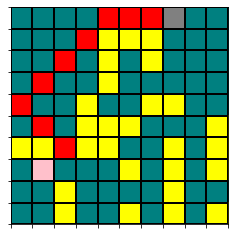

calliing BFS
Cost:  540
calliing DFS


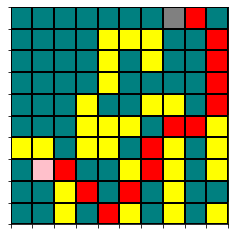

calliing DFS
Cost:  587
calling UCS


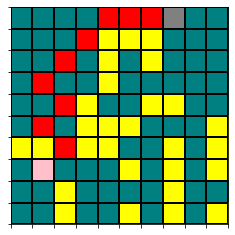

calling UCS
Cost:  478


In [4]:
start = (0, 7)
goal = (7, 1)
robot = Robot()

#bfs
path = robot.path_solver.breadth_first_search(start, goal, robot.env.edge_weights_2)
robot.show_env_and_path(path)
print("Cost: ",robot.path_solver.breadth_first_search(start, goal, robot.env.edge_weights_2, return_cost=True)[1])

#dfs
path = robot.path_solver.depth_first_search(start, goal, robot.env.edge_weights_2)
robot.show_env_and_path(path)
print("Cost: ",robot.path_solver.depth_first_search(start, goal, robot.env.edge_weights_2, return_cost=True)[1])

#ucs
path = robot.path_solver.uniform_cost_search(start, goal, robot.env.edge_weights_2)
robot.show_env_and_path(path)
print("Cost: ",robot.path_solver.uniform_cost_search(start, goal, robot.env.edge_weights_2, return_cost=True)[1])

| Algorithm | Path Cost  |
|------|------|
|   BFS  | 540 |
|   DFS  | 587 |
|   UCS  | 478 |

### PART 2B)

Implement the function `a_star_euclidian` in [pathSolver.py](https://github.com/coloradointroai/hw_spring_2022/blob/master/colorado_intro_ai/hw2/pathSolver.py). The function should return the f(n), where $f(n) = g(n) + h(n)$. Demonstrate your function works by calling it using the `Robot` class. 

For full credit include the following:

- I) a visualization of the original and solved env using `show_env_and_path` 
- II) Explain what benefits this algorithm has over bfs, dfs, and ucs.

#### Function Details
The A* objective function is $f(n) = g(n) + h(n)$. In this implementation $h(n) = \sqrt{(x_g - x_n)^2 + (y_g - y_n)^2}$. In this equation; $x_g$ and $x_n$ represent the column location of goal and current node, repectively. The variables $y_g$ and $y_n$ are the row values of each node.

In [5]:
def a_star_euclidian(self,start: tuple, goal, state_graph, return_cost=False):
        f = Frontier_PQ(start,0)
        visited = {}
        previous = {}
        previous[start]=None

        while f.q:
            cost,current = f.pop()

            if current:
                
                h = sqrt((goal[1][0] - current[1][0])**2 + (goal[1][1]-current[1][1])**2)
                
                if current == goal: 
                    path_out = self.path(previous, goal)
                    if return_cost: return path_out, self.pathcost(path_out, state_graph)
                    return path_out

                visited[current] = cost

                for adj in state_graph[current]:
                    total_cost = visited[current] + state_graph[current][adj]

                    if adj not in visited:
                        if adj not in f.states:
                            f.add(adj, total_cost)
                            previous[adj] = current

                    elif adj in f.states: 
                        if f.states[adj] > (total_cost + h):
                            f.replace(adj,total_cost)
                            previous[adj] = current

        if return_cost: 
            return [], 0
        else:
            return []

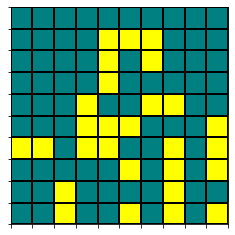

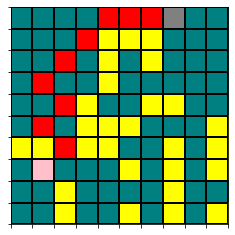

Cost:  478


In [6]:
robot.show_env()
path = robot.path_solver.a_star_euclidian(start, goal, robot.env.edge_weights_2)
robot.show_env_and_path(path)
print("Cost: ",robot.path_solver.a_star_euclidian(start, goal, robot.env.edge_weights_2, return_cost=True)[1])

II) This algorithm's benefits over BFS, DFS, and UCS is that, while UCS finds the shortest path, it expands more nodes in the process. A* minimizes the number of expanded nodes, making it more efficient while still finding an optimal solution (as long as the heuristic is admissible). 

### PART 2C)

Implement the function `a_star_manhattan` in [pathSolver.py](https://github.com/coloradointroai/hw_spring_2022/blob/master/colorado_intro_ai/hw2/pathSolver.py). Demonstrate your function works by calling it using the `Robot` class. 

For full credit include the following:

- I) A visualization of the original and solved env using `show_env_and_path`, include the path cost.
- II) You must create and use a private class function within `a_star_manhattan` that computes the value of $h(x)$. You pick the private function name. 
- III) Give a short explanation of why you would create a private function within a class in a personal project you are sharing with a friend.

#### Function Details
The A* objective function is $f(n) = g(n) + h(n)$. In this implementation $h(n) = (x_g - x_n) + (y_g - y_n)$. In this equation; $x_g$ and $x_n$ represent the column location of goal and current node, repectively. The variables $y_g$ and $y_n$ are the row values of each node. The robot _CAN_ still move in all 8 directions.

In [7]:
 def a_star_manhattan(self,start: tuple, goal, state_graph, return_cost=False):
        f = Frontier_PQ(start,0)
        visited = {}
        previous = {}
        previous[start]=None

        while f.q:
            cost,current = f.pop()

            if current:
        
                def heuristic(goal, current):
                    return (goal[0] - current[0]) + (goal[1]-current[1])
                
                h = heuristic(goal,current)
                
                if current == goal: 
                    path_out = self.path(previous, goal)
                    if return_cost: return path_out, self.pathcost(path_out, state_graph)
                    return path_out

                visited[current] = cost

                for adj in state_graph[current]:
                    total_cost = visited[current] + state_graph[current][adj]

                    if adj not in visited:
                        if adj not in f.states:
                            f.add(adj, total_cost)
                            previous[adj] = current

                    elif adj in f.states:
                        if f.states[adj] > (total_cost + h):
                            f.replace(adj,total_cost)
                            previous[adj] = current

        if return_cost: 
            return [], 0
        else:
            return []

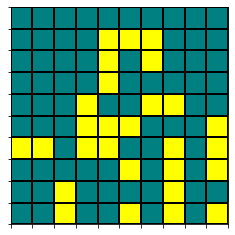

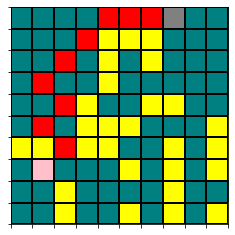

Cost:  478


In [8]:
robot.show_env()
path = robot.path_solver.a_star_manhattan(start, goal, robot.env.edge_weights_2)
robot.show_env_and_path(path)
print("Cost: ",robot.path_solver.a_star_manhattan(start, goal, robot.env.edge_weights_2, return_cost=True)[1])

III) Creating a private function within a class in a personal project you are sharing with a friend would be helpful, as it could be reused much easier than the alternatives.

# Problem 3 - Heuristics

- For questions 3A, 3B, 3C, and 3D answer True or False and provide a brief explanation, or a counterexample where applicable.

- For question 3E, provide a brief explanation.

### Part 3A. 
Depth-first search always expands at least as many nodes as A* search with an admissible heuristic.

False: There are cases in which DFS expands less nodes than A* because DFS goes down the branch of the tree/graph containing the goal by luck.

### Part 3B. 
Uniform cost search always expands at least as many nodes as A* search with an admissible heuristic.

True: Uniform cost search is A* search with heuristic 0, which is admissible. It will either do the same or worse than an A* search with an admissible heuristic. 

### Part 3C. 
In the game of chess, in a single move, a rook can move any number of squares on a chessboard in a straight line, either vertically or horizontally, but cannot jump over other pieces. Manhattan distance is an admissible heuristic for the smallest number of moves required to move the rook from square A to square B.

False: The Manhattan distance is not an admissible heuristic, as it may overestimate the remaining number of moves to the goal since a rook can cover more than one square in one move. 

### Part 3D.
Assume you are given multiple admissible heuristics for a problem and you're unsure about which heuristic is the best. You can use both heuristics by summing them to produce a new heuristic that is also admissible. 

False: While $\frac{1}{n}h_1 + \frac{1}{n}h_2 + ... + \frac{1}{n}h_n$ works, simply summing the heuristics will likely make the estimates too large/pessimistic and thus, the new heuristic would not be admissible.

### Part 3E.

Using the graph shown, describe why a heuristic must be admissible and consistent for A* search to find an optimal path. Be specific in your answer. 

Hint: Consider paths starting at $S$ and ending at $C$.

![](../imgs/AStarGraph.png)

An *admissible* heuristic never overestimates the distance from a node to the goal. For a heuristic to be *consistent*, the heuristic difference/step cost never overestimates the actual step cost. Along the sequence of nodes from start to goal that the heuristic recommends, a consistent heuristic should always remain constant or decrease in value. Because of this, a consistent heuristic is also always admissible.  

For A* search to find an optimal path, the heuristic must eliminate any nonoptimal paths by being optimistic enough to have the search algorithm consider all possible paths. If it is not consistent and admissible, it may go down one path and find the goal before it is able to fully explore another possible solution. Therefore, it could miss the optimal solution.    

Example: considering the graph shown and paths from S to C:  

Let's say we used a heuristic that changed only h(A) to 5. The heuristic is no longer consistent since $5 \leq (1 + 0)$ is not true. It is no longer admissible either since 5 is greater than the actual cost 3.    

A* search would explore A, add (S,A) with cost 6 and (S,B) with cost 3 to the frontier, and explore B. Then (B,C) with cost 5 would be added and be explored since it's still lesser cost than (S,A). Since the goal node would be added to explored, the program would terminate. However, this is not the optimal solution for this graph. Thus, a consistent and admissible heuristic is necessary to always find an optimal path. 

